In [20]:
import nltk
import string
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
import pandas as pd
from sklearn.model_selection import train_test_split

# Ensure necessary downloads
nltk.download('twitter_samples')

import os
# Set nltk data path manually
nltk_data_path = os.path.join(os.getcwd(), 'nltk_data')
if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)
nltk.data.path.append(nltk_data_path)

# Ensure required downloads
nltk.download('twitter_samples', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('punkt_tab', download_dir=nltk_data_path)


[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     c:\Users\HP\OneDrive\Desktop\ML Training\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\HP\OneDrive\Desktop\ML Training\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\HP\OneDrive\Desktop\ML Training\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     c:\Users\HP\OneDrive\Desktop\ML Training\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
from nltk.corpus import twitter_samples

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
print('Number of positive tweets:', len(all_positive_tweets))
print('Number of negative tweets:', len(all_negative_tweets))

# Create a DataFrame
data = pd.DataFrame({
    'Tweet': all_positive_tweets + all_negative_tweets,
    'Sentiment': [1] * len(all_positive_tweets) + [0] * len(all_negative_tweets)
})

data.head()


Number of positive tweets: 5000
Number of negative tweets: 5000


,Tweet,Sentiment
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          10000 non-null  object
 1   Sentiment      10000 non-null  int64 
 2   Cleared_Tweet  10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [122]:
data.describe()

,Sentiment
count,10000.000000
mean,0.500000
std,0.500025
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
#Choose ProterStemmer, others put lower or same impact as PorterStemmer while experimenting.

stemmer = PorterStemmer()
# stemmer = LancasterStemmer() 
# lemmatizer = WordNetLemmatizer()


stop_words = set(stopwords.words('english'))


In [ ]:
def remove_emoji(text):
    return emoji.replace_emoji(text, replace="")

def cleaning(tweet):
    tweet = remove_emoji(tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(tweet)
    words = [word.lower() for word in words if word.isalpha() and word not in stop_words]
    stemmed_words = [stemmer.stem(word) for word in words]
    #stemmed_words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(stemmed_words)


In [18]:
data['Cleared_Tweet'] = data['Tweet'].apply(cleaning)

data.head(10)


,Tweet,Sentiment,Cleared_Tweet
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,followfriday franceint milipolpari top engag m...
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,hey jame how odd pleas call contact centr abl ...
2,@DespiteOfficial we had a listen last night :)...,1,despiteoffici listen last night as you bleed a...
3,@97sides CONGRATS :),1,congrat
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,yeaaaah yippppi accnt verifi rqst succeed got ...
5,@BhaktisBanter @PallaviRuhail This one is irre...,1,bhaktisbant pallaviruhail thi one irresist fli...
6,We don't like to keep our lovely customers wai...,1,we dont like keep love custom wait long we hop...
7,"@Impatientraider On second thought, there’s ju...",1,impatientraid on second thought enough time dd...
8,"Jgh , but we have to go to Bayan :D bye",1,jgh go bayan d bye
9,"As an act of mischievousness, am calling the E...",1,as act mischiev call etl layer inhous wareh ap...


In [21]:
data.head(25) # Row 25 contained emojis, let's see if we managed to remove them correctly.


,Tweet,Sentiment,Cleared_Tweet
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,followfriday franceint milipolpari top engag m...
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,hey jame how odd pleas call contact centr abl ...
2,@DespiteOfficial we had a listen last night :)...,1,despiteoffici listen last night as you bleed a...
3,@97sides CONGRATS :),1,congrat
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,yeaaaah yippppi accnt verifi rqst succeed got ...
5,@BhaktisBanter @PallaviRuhail This one is irre...,1,bhaktisbant pallaviruhail thi one irresist fli...
6,We don't like to keep our lovely customers wai...,1,we dont like keep love custom wait long we hop...
7,"@Impatientraider On second thought, there’s ju...",1,impatientraid on second thought enough time dd...
8,"Jgh , but we have to go to Bayan :D bye",1,jgh go bayan d bye
9,"As an act of mischievousness, am calling the E...",1,as act mischiev call etl layer inhous wareh ap...


In [ ]:
# Seperating data into training and testing sets
x = data['Cleared_Tweet']
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # shuffle=True is default


In [ ]:
# Importing TfidfVectorizer from sklearn to convert text data into numerical format

from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Final model after experimentation with alpha
model=MultinomialNB(alpha=10)
model.fit(X_train_vec, y_train)




MultinomialNB(alpha=10)

In [ ]:
# Importing accuracy score, classification report and confusion matrix to evaluate the model perfomance

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred=model.predict(X_test_vec)

print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score:
 0.7515
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76       988
           1       0.78      0.71      0.74      1012

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000

Confusion Matrix:
 [[788 200]
 [297 715]]


In [ ]:
from sklearn.linear_model import LogisticRegression

# Final model after experimentation with max_iter and C
model_2=LogisticRegression(C=1, max_iter=5000) 
model_2.fit(X_train_vec,y_train)

y_pred_lr=model_2.predict(X_test_vec)

print("Accuracy Score:\n", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test,y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Accuracy Score:
 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76       988
           1       0.78      0.74      0.76      1012

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

Confusion Matrix:
 [[776 212]
 [268 744]]


In [119]:
from sklearn.svm import SVC

# Final model after experimentation with kernel, gamma and C
model_3 = SVC(C=1, kernel='rbf', gamma=1)
model_3.fit(X_train_vec,y_train)

y_pred_svc=model_3.predict(X_test_vec)

print("Accuracy Score:\n", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test,y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))




Accuracy Score:
 0.7595
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77       988
           1       0.78      0.73      0.75      1012

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

Confusion Matrix:
 [[785 203]
 [278 734]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Final model after experimentation with n_estimators and max_depth
model_4=RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=42) 
model_4.fit(X_train_vec,y_train)

y_pred_rf=model_4.predict(X_test_vec)

print("Accuracy Score:\n", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test,y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Accuracy Score:
 0.754
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       988
           1       0.81      0.68      0.74      1012

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.76      0.75      0.75      2000

Confusion Matrix:
 [[824 164]
 [328 684]]


In [ ]:
# Because Logistic Regression had highest Accuracy Score, decided to see actual and predicted values at this model
for actual, predicted in zip(y_test, y_pred_lr):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 1, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predi

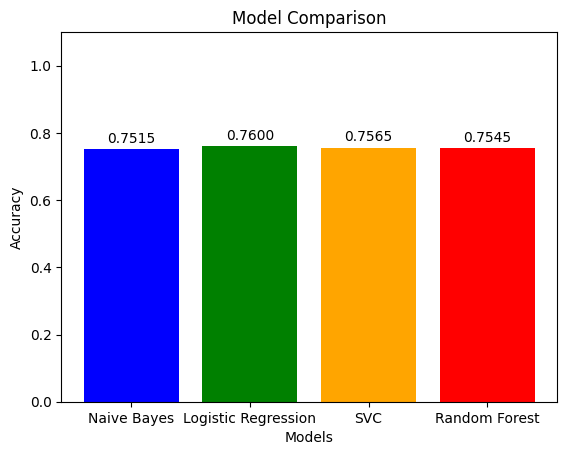

In [96]:
import matplotlib.pyplot as plt

# Define model names and accuracies
models = ['Naive Bayes', 'Logistic Regression', 'SVC', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_svc),
    accuracy_score(y_test, y_pred_rf)
]

# Create the bar plot
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])

# Add labels above the bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{acc:.4f}', 
             ha='center', fontsize=10)

# Customize the plot
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1.1)  # Ensure there's space for the labels above the bars
plt.show()


The final accuracy achieved was 0.76 using Logistic Regression. While this score is not exceptionally high, it is reasonable for a sentiment analysis task with classical machine learning models and TF-IDF features.
